IMPORTING THE NECESSARY PYTHON LIBRARIES AND THE DATASET


In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xgboost

In [3]:
#libraries used

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import os
import re
import warnings

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import  train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
scaler=StandardScaler()



from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
#Read csv file

df = pd.read_csv('dataset.csv', encoding='latin1')
df

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0            3920       2586           1028           619          56     98   
1            5394       2727           1838          1174          78    194   
2            4021       2085           1188             0         533     41   
3            4528       2700            621           932          73    172   
4            2518       1704            255           279          37     96   
...           ...        ...            ...           ...         ...    ...   
1002        17907       3828           1024           613         503     71   
1003         9457       2568           1868           469         515    415   
1004         9625       2286            731           413         182    128   
1005        12776       2367            309           299          27    601   
1006         7306       2543            599           821         587    536   

      Comments  Shares  Followers  Likes  Profile Visits  Follows  \
0          9.0       5       3266    162              35        2   
1          7.0      14        715    224              48       10   
2         11.0       1        672    131              62       12   
3         10.0       7       1217    213              23        8   
4          5.0       4       2100    123               8        0   
...        ...     ...        ...    ...             ...      ...   
1002      21.0      15       1879    462              94       31   
1003      15.0       8       2946    558              99      137   
1004      39.0      15       1381    289              78       98   
1005      20.0       6       3317    209             100       87   
1006      32.0      15       3019    194              34       66   

      Time since posted                                            Caption  \
0                     3  Here are some of the most important data visua...   
1                     2  Here are some of the best data science project...   
2                    11  Learn how to train a machine learning model an...   
3                    16  Hereâs how you can write a Python program to...   
4                    17  Plotting annotations while visualizing your da...   
...                 ...                                                ...   
1002                 23  Time series analysis means analyzing and findi...   
1003                 21  Here are some of the best data sources that yo...   
1004                 19  One of the mistakes data science newbies make ...   
1005                 16  Here are some of the best data science project...   
1006                 19  178 Python Projects with Source Code solved an...   

                                               Hashtags  
0     #financeÂ #moneyÂ #businessÂ #investingÂ #inve...  
1     #healthcareÂ #healthÂ #covidÂ #dataÂ #datascie...  
2     #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
3     #pythonÂ #pythonprogrammingÂ #pythonprojectsÂ ...  
4     #datavisualizationÂ #datascienceÂ #dataÂ #data...  
...                                                 ...  
1002  #timeseriesÂ #timeÂ #statisticsÂ #datascienceÂ...  
1003  #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
1004  #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
1005  #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
1006  #pythonÂ #pythonprogrammingÂ #pythonprojectsÂ ...  

[1007 rows x 15 columns]

check data

In [5]:
df.columns


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Followers', 'Likes',
       'Profile Visits', 'Follows', 'Time since posted', 'Caption',
       'Hashtags'],
      dtype='object')

In [6]:
df.shape

(1007, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Impressions        1007 non-null   int64  
 1   From Home          1007 non-null   int64  
 2   From Hashtags      1007 non-null   int64  
 3   From Explore       1007 non-null   int64  
 4   From Other         1007 non-null   int64  
 5   Saves              1007 non-null   int64  
 6   Comments           1006 non-null   float64
 7   Shares             1007 non-null   int64  
 8   Followers          1007 non-null   int64  
 9   Likes              1007 non-null   int64  
 10  Profile Visits     1007 non-null   int64  
 11  Follows            1007 non-null   int64  
 12  Time since posted  1007 non-null   int64  
 13  Caption            1007 non-null   object 
 14  Hashtags           1007 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 118.1+ KB


In [8]:
a = df.isnull().sum()

Analyzing Instagram Reach

form home 

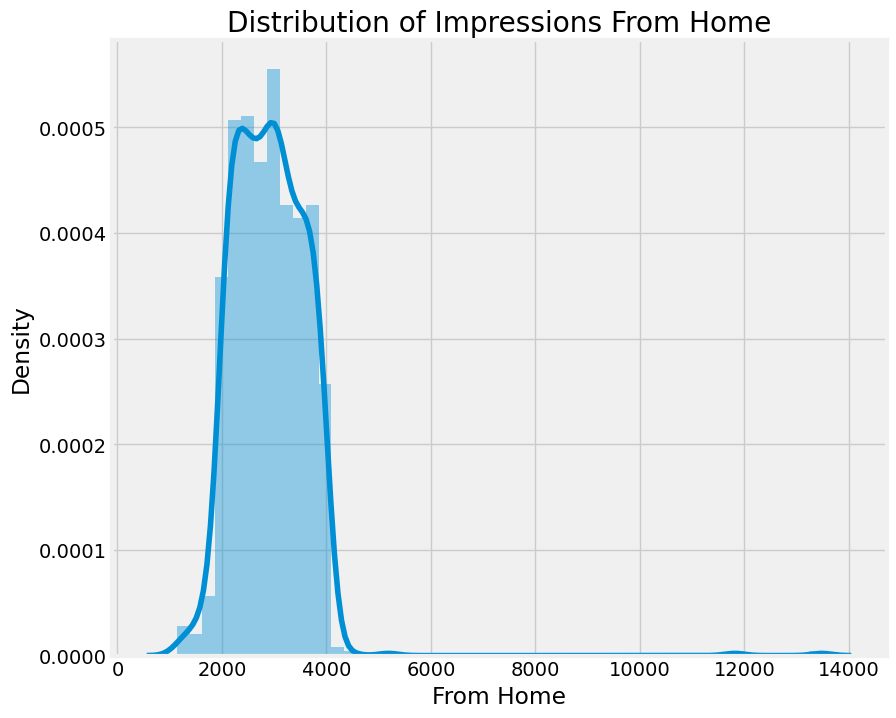

In [9]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(df['From Home'])
plt.show()

from Hastags

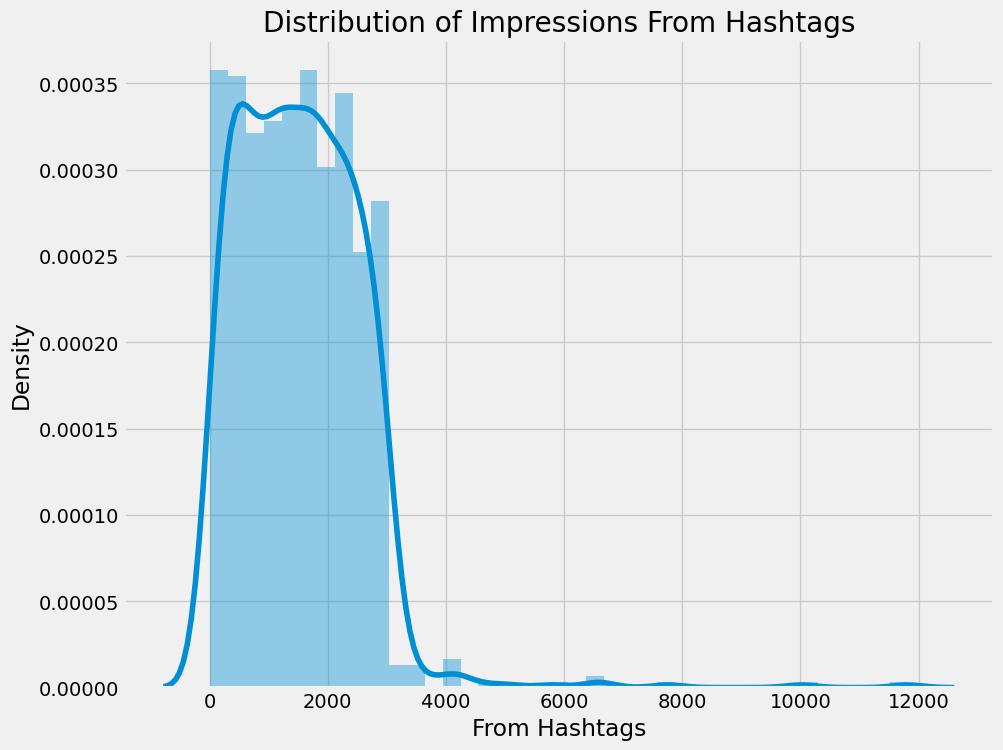

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

from explore

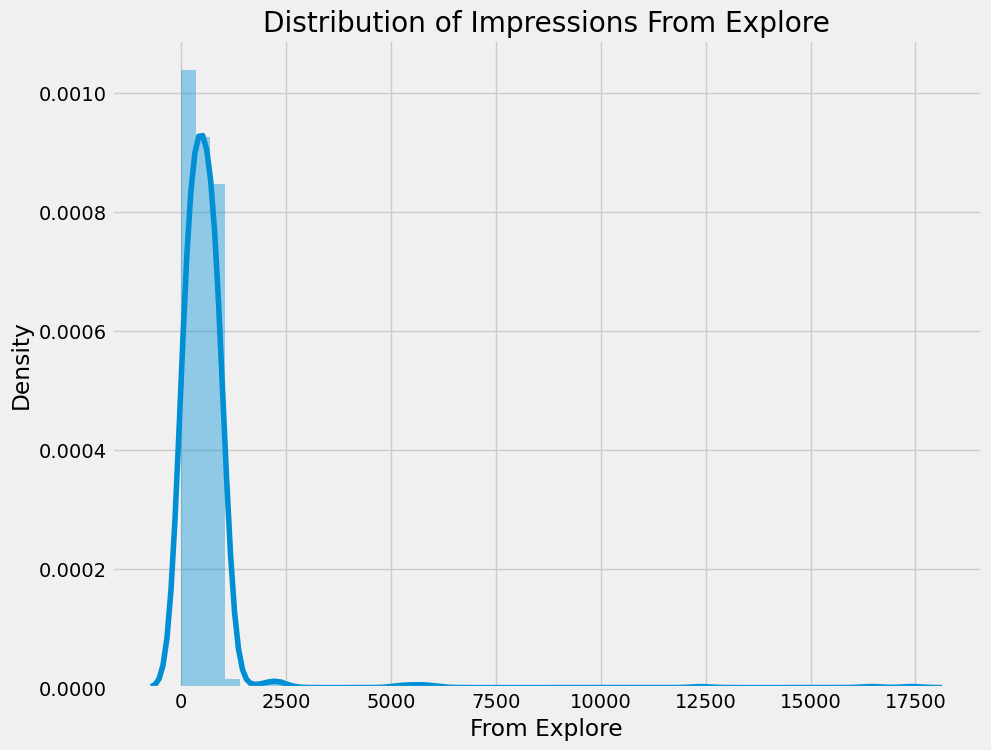

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df['From Explore'])
plt.show()

percentage of impressions I get from various sources on Instagram

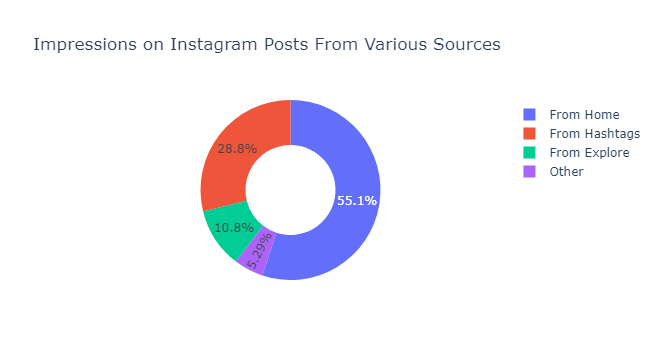

In [12]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

Analyzing Relationships

relationship between the number of likes and the number of impressions

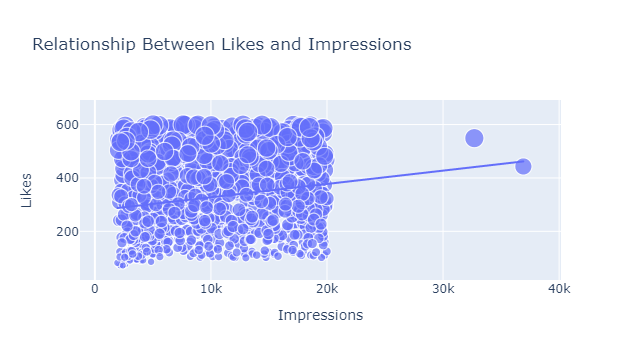

In [13]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

relationship between the number of comments and the number of impressions

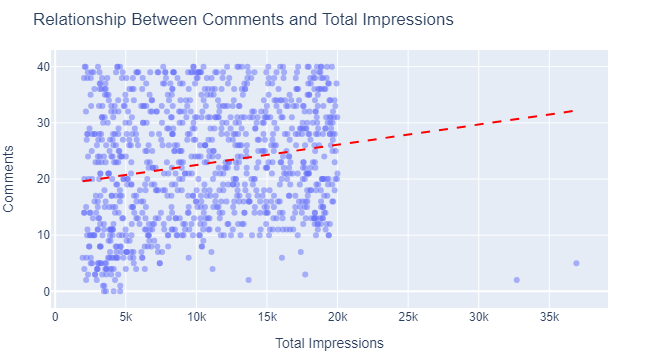

In [14]:
# Check for NaN or Inf values
nan_values = df["Comments"].isna()
inf_values = np.isinf(df["Comments"])

# Handle NaN values (replace with 0)
df["Comments"].fillna(0, inplace=True)

# Convert "Comments" column to integers
df["Comments"] = df["Comments"].astype(int)

# Sample subset of data
sampled_df = df.sample(n=1000)  # Adjust the number of samples as needed

# Plot scatter plot with trendline
figure = px.scatter(sampled_df, x="Impressions", y="Comments", 
                    trendline="ols", title="Relationship Between Comments and Total Impressions",
                    opacity=0.5, size_max=15)  # Adjust opacity and marker size

# Customize trendline appearance
figure.update_traces(line=dict(color='red', width=2, dash='dash'), selector=dict(mode='lines'))

# Customize layout
figure.update_layout(
    xaxis_title="Total Impressions",
    yaxis_title="Comments",
    legend_title="Trendline",
    font=dict(family="Arial", size=12),
    margin=dict(l=50, r=50, t=50, b=50),
    hovermode="closest"
)

# Show the plot
figure.show()

 relationship between the number of shares and the number of impressions

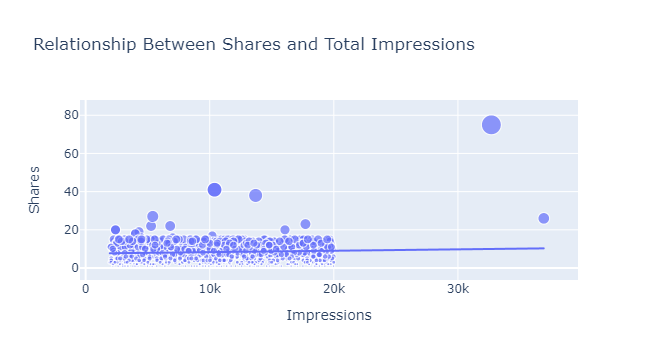

In [15]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

relationship between the number of saves and the number of impressions

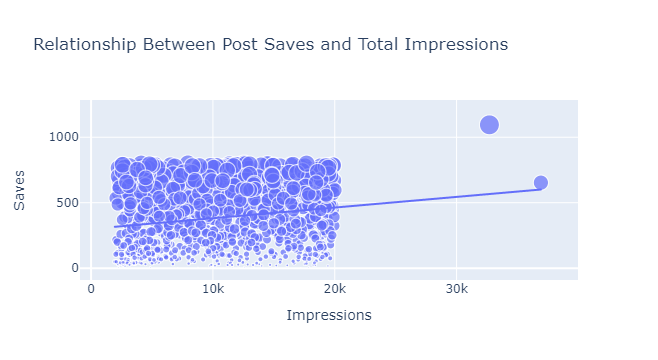

In [16]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

Analyzing Conversion Rate

In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:

In [17]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

177.69571346318025


relationship between the total profile visits and the number of followers gained from all profile visits

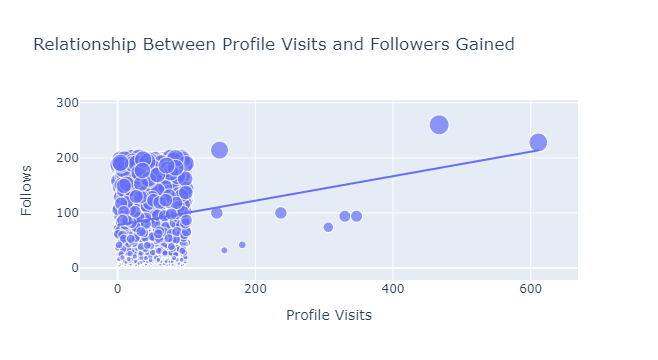

In [18]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [19]:
def WordCloudPlotter(dfColumn):
    wordHeading = df[dfColumn]
    textCloud = ''
    
    for mem in wordHeading:
        textCloud = textCloud + str(mem).lower()
        
    cloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stopwords, min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8),facecolor = None) 
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("word cloud : "+str(dfColumn))
    
    plt.show()

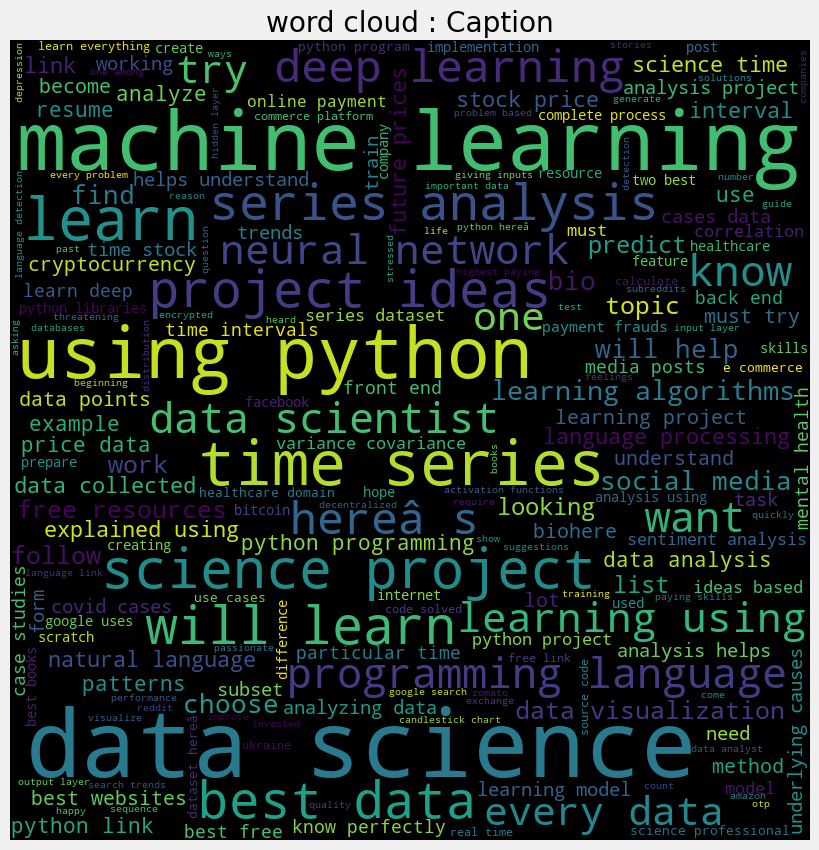

In [20]:
WordCloudPlotter('Caption')

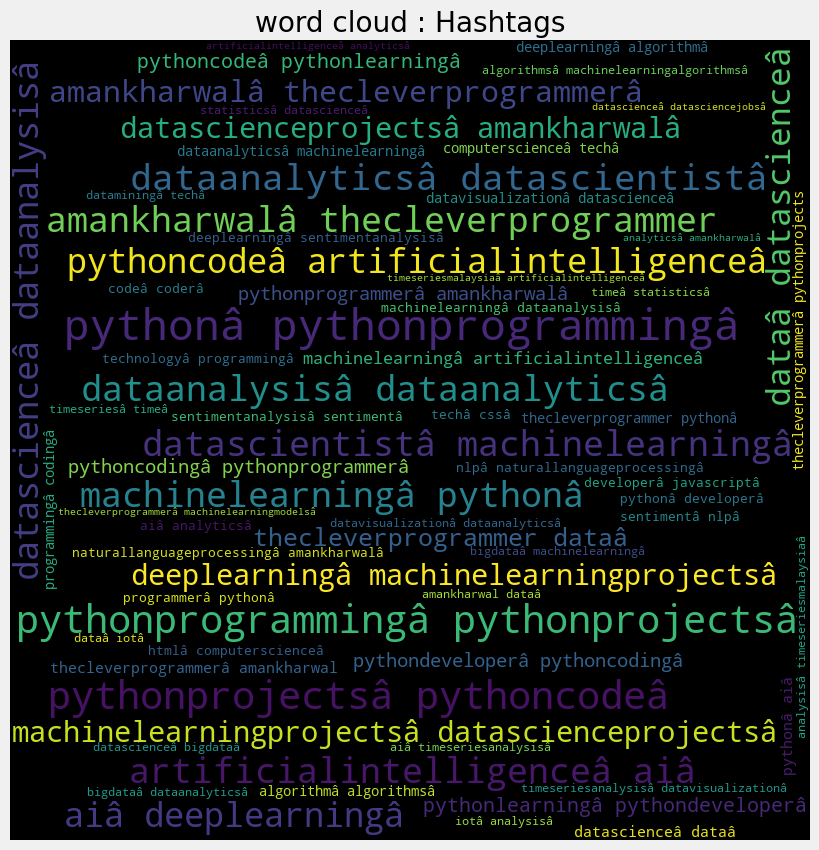

In [21]:
WordCloudPlotter("Hashtags")


In [22]:
def plotdfconclusion(featurevector):
    plt.figure(figsize = (20,10))
    
    pltnum = 1
    for mem in featurevector:
        plt.subplot(1,2,pltnum)
        plt.grid(True)
        plt.title("regplot plo for "+str(mem))
        sns.regplot(data =  df, x=mem, y='Likes', color = 'green')
        pltnum +=1
        
    plt.show()

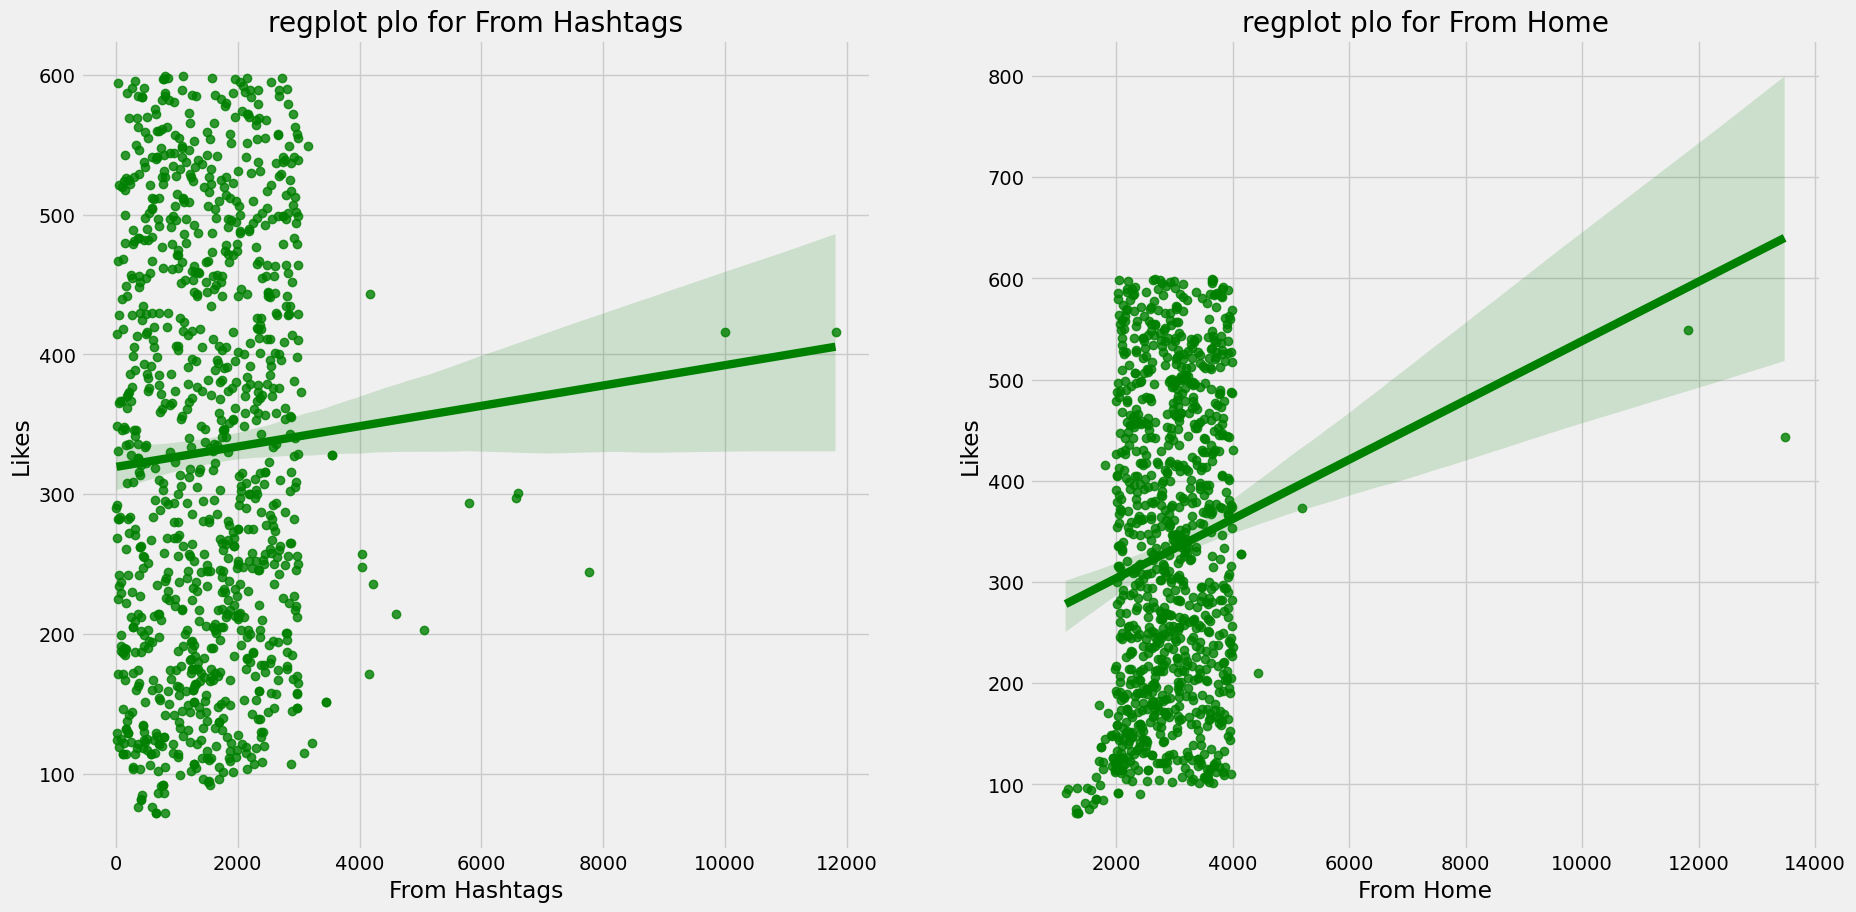

In [23]:
plotdfconclusion(['From Hashtags','From Home'])

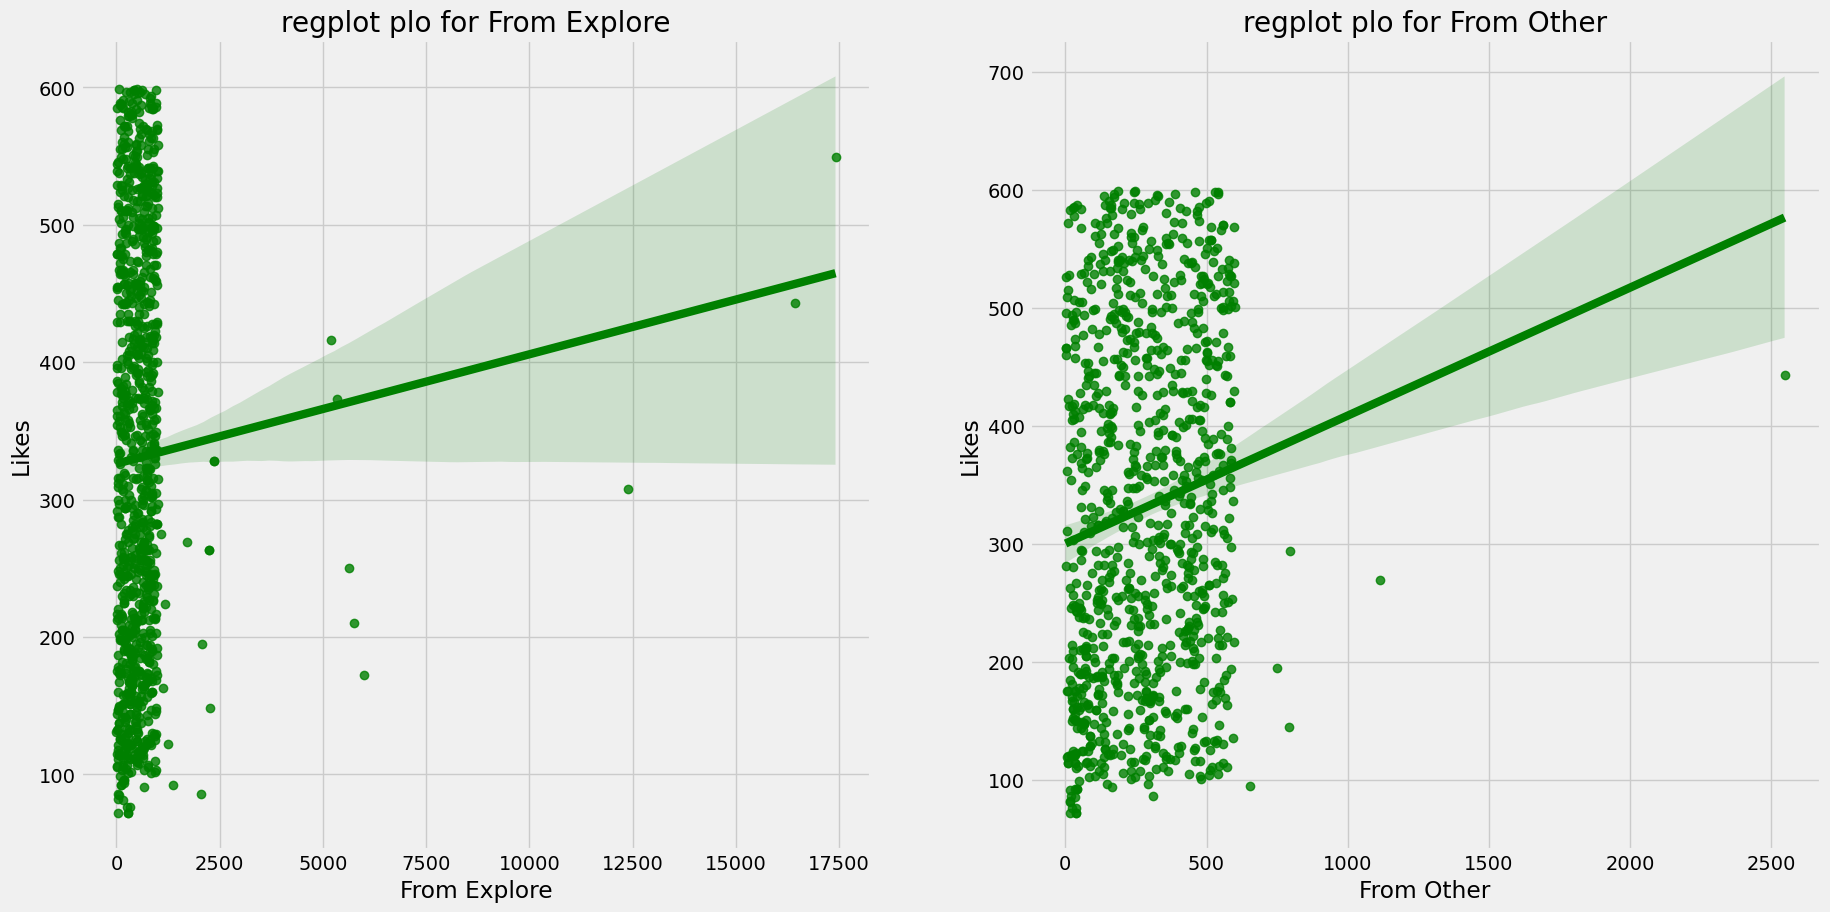

In [24]:
plotdfconclusion(['From Explore','From Other'])

conversion rate

In [25]:
conversion_rate = (df["Likes"].sum() / df["Followers"].sum()) * 100
print(conversion_rate)

12.088757035565546


So we can see here that the conversion rate is mere 7.07%

In [26]:
featureVector = np.array(df[['From Hashtags','From Home']],dtype = 'float32')
targetValues = np.array(df["Likes"], dtype = "float32")
maxValuelikes = max(targetValues)
print("maximum value of target is {} ".format(maxValuelikes))


maximum value of target is 599.0 


In [27]:
featureVector = np.array(df[['From Explore','From Other']],dtype = 'float32')
targetValues = np.array(df["Likes"], dtype = "float32")
maxValuelikes = max(targetValues)
print("maximum value of target is {} ".format(maxValuelikes))

maximum value of target is 599.0 


In [28]:
targetValues

array([162., 224., 131., ..., 289., 209., 194.], dtype=float32)

In [29]:
targetValues = targetValues/maxValuelikes

In [30]:
targetValues

array([0.27045074, 0.3739566 , 0.21869783, ..., 0.48247078, 0.34891486,
       0.32387313], dtype=float32)

In [31]:
featureVector

array([[ 619.,   56.],
       [1174.,   78.],
       [   0.,  533.],
       ...,
       [ 413.,  182.],
       [ 299.,   27.],
       [ 821.,  587.]], dtype=float32)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targetValues, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor
hbr = HistGradientBoostingRegressor()
hbr.fit(xTrain, yTrain)

HistGradientBoostingRegressor()

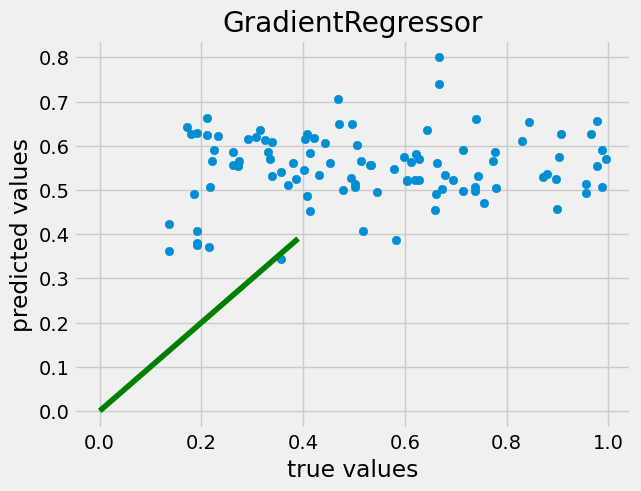

In [35]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

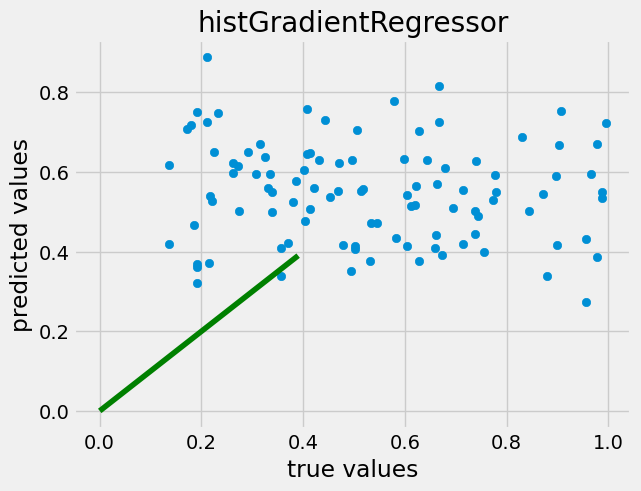

In [36]:
predictions = hbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('histGradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [37]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)

    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValuelikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

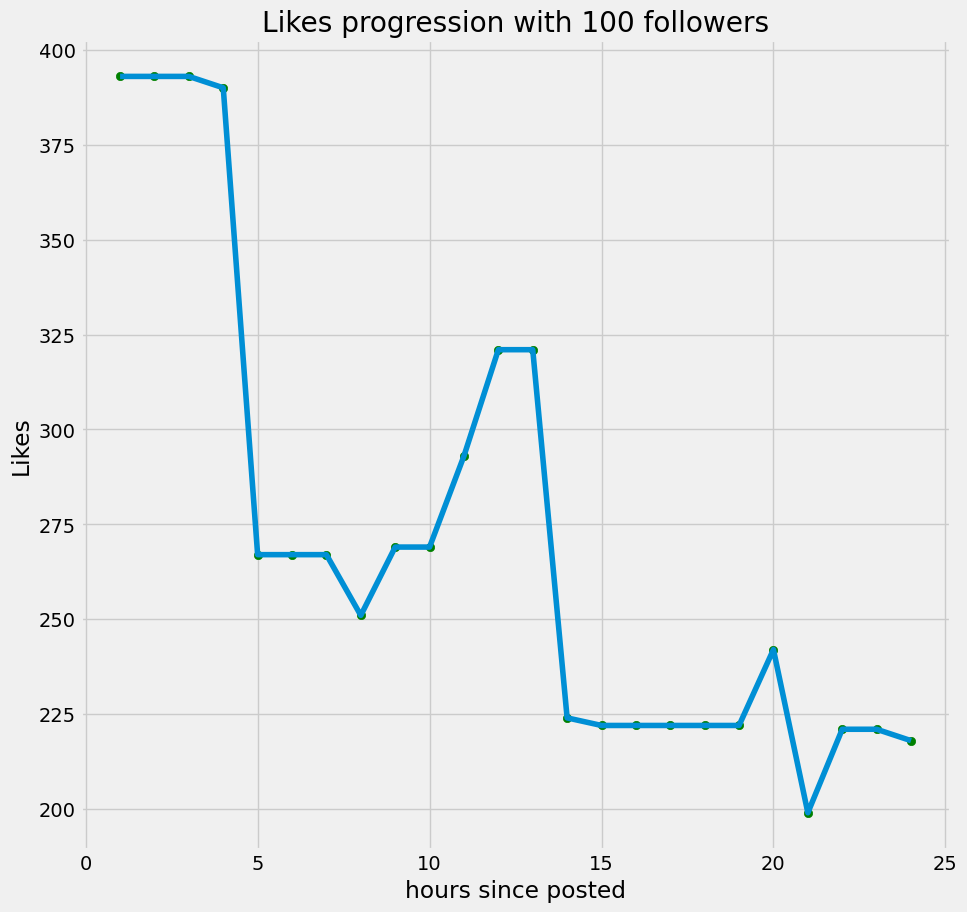

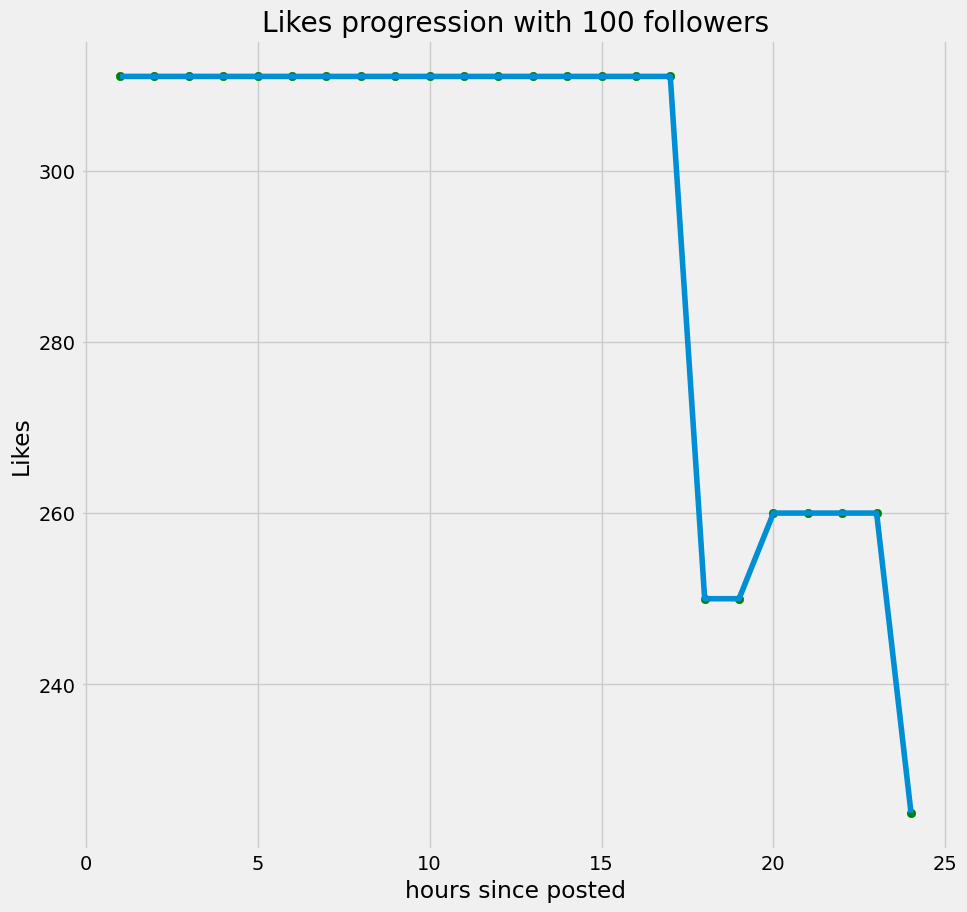

In [38]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValuelikes)
PredictionsWithConstantFollowers(hbr, 100, stdSc, maxValuelikes)


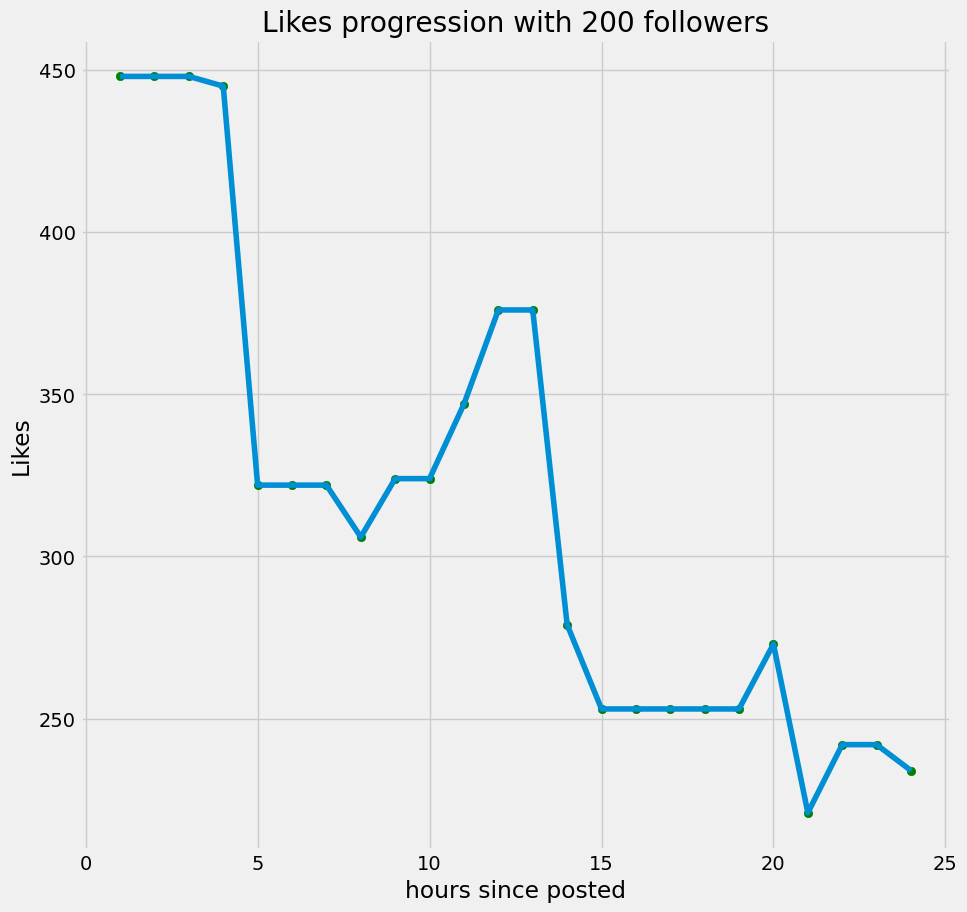

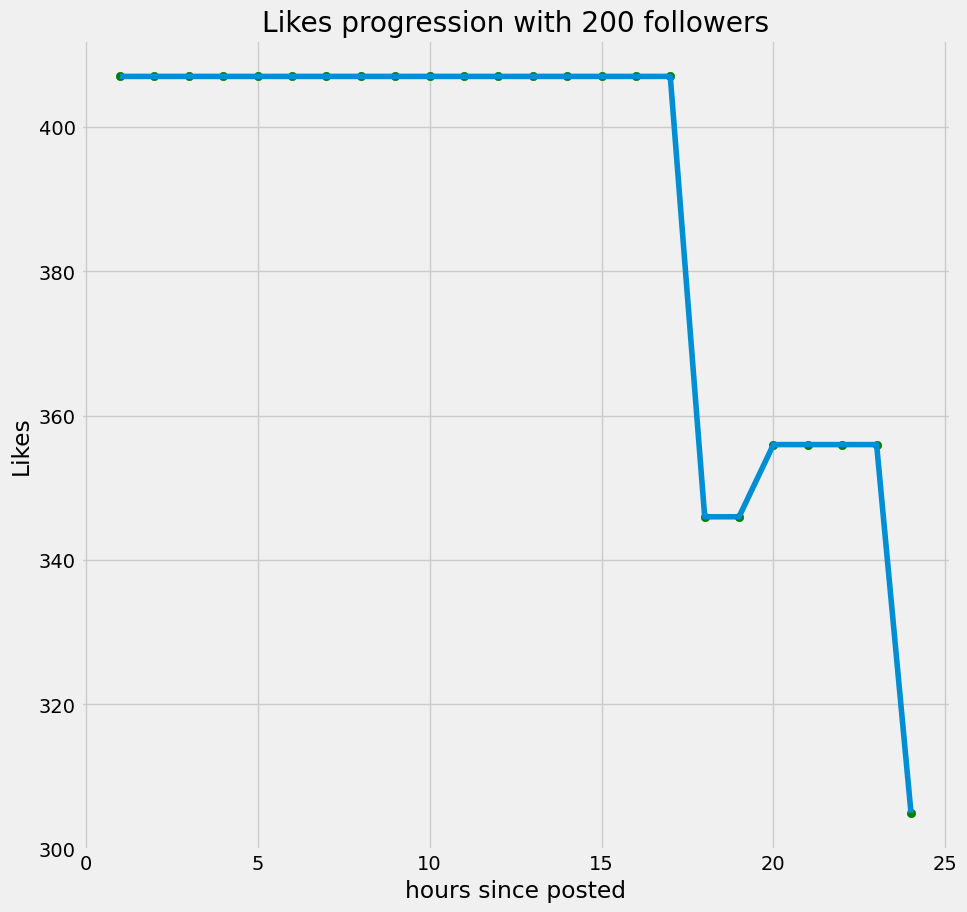

In [39]:
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValuelikes)
PredictionsWithConstantFollowers(hbr, 200, stdSc, maxValuelikes)

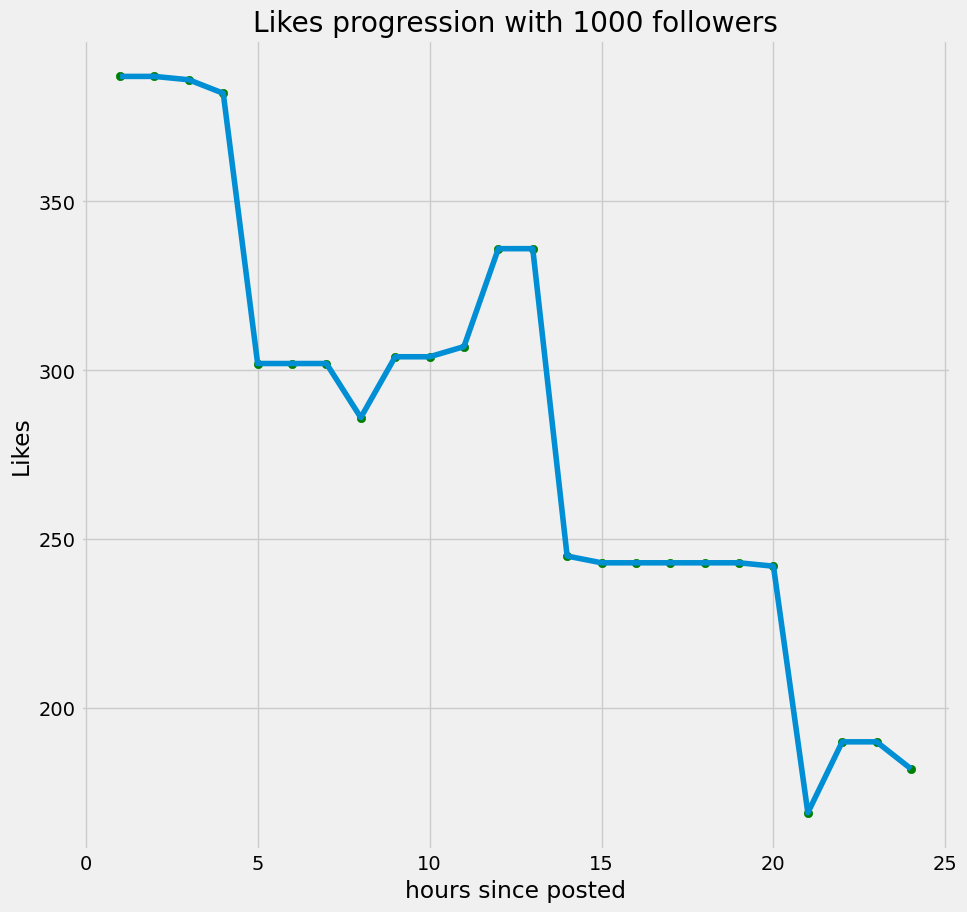

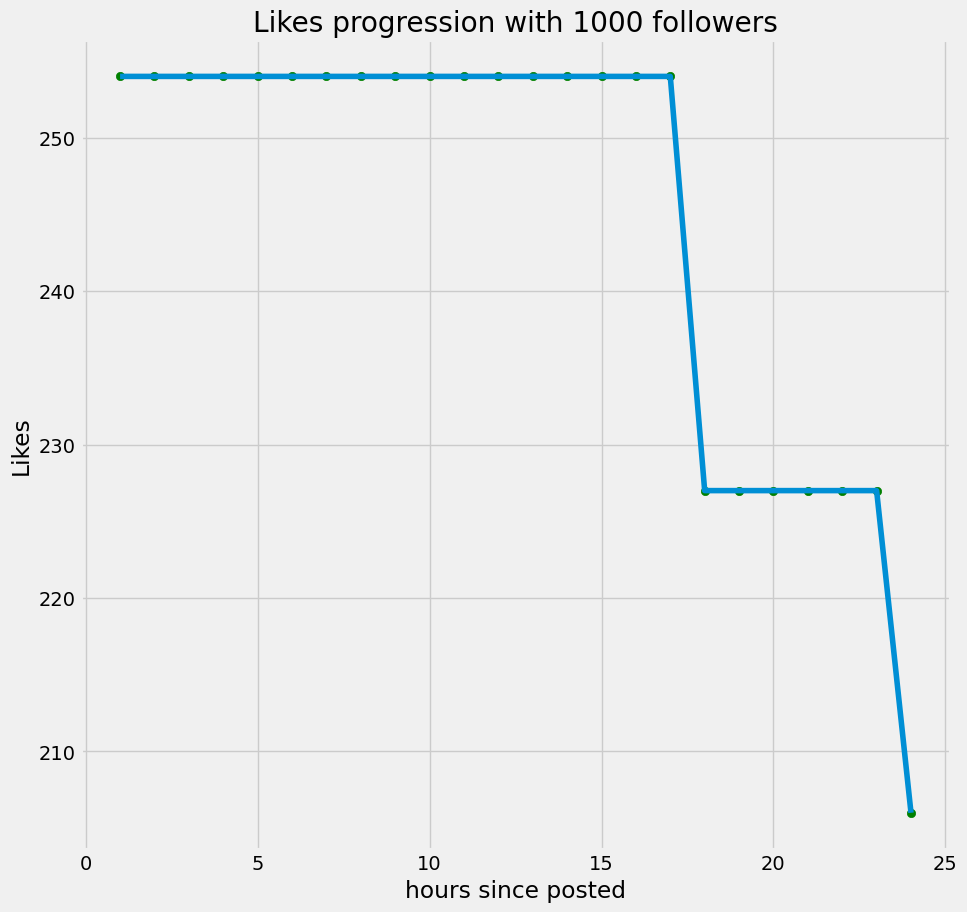

In [40]:
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValuelikes)
PredictionsWithConstantFollowers(hbr, 1000, stdSc, maxValuelikes)

In [41]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValuelikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

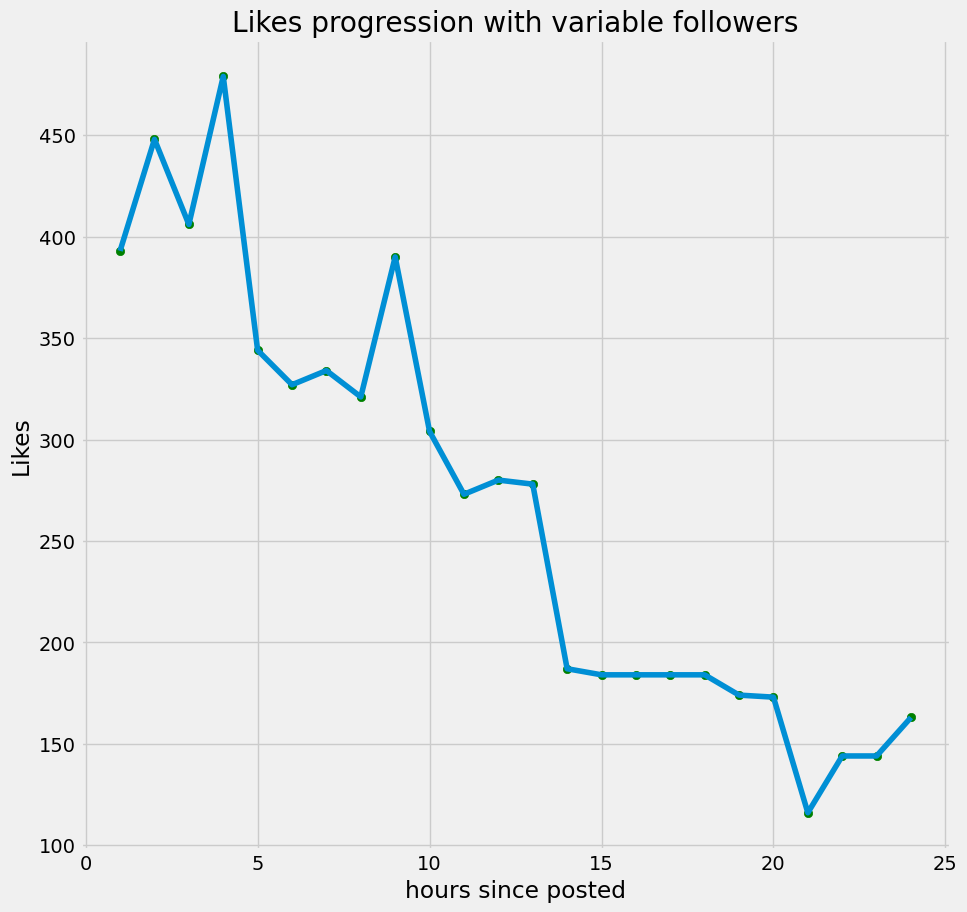

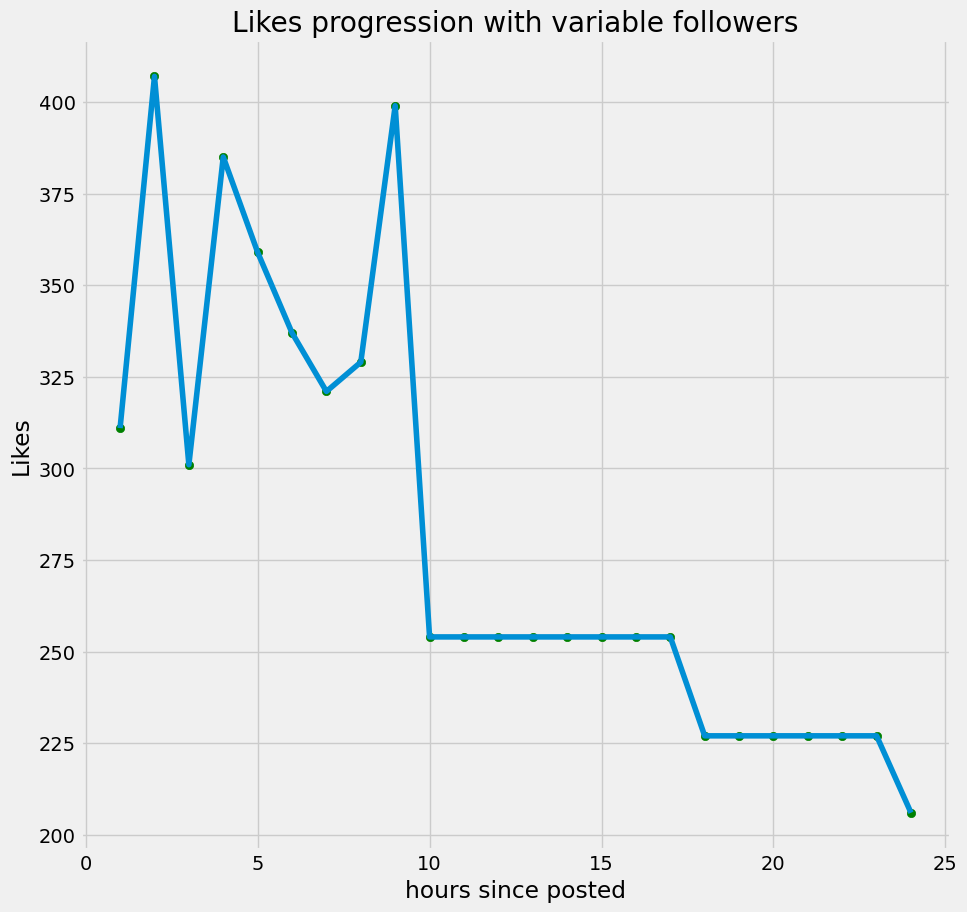

In [42]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValuelikes)
PredictionsWithVariableFollowers(hbr, 1000, stdSc, maxValuelikes)

analyzing instagram reach

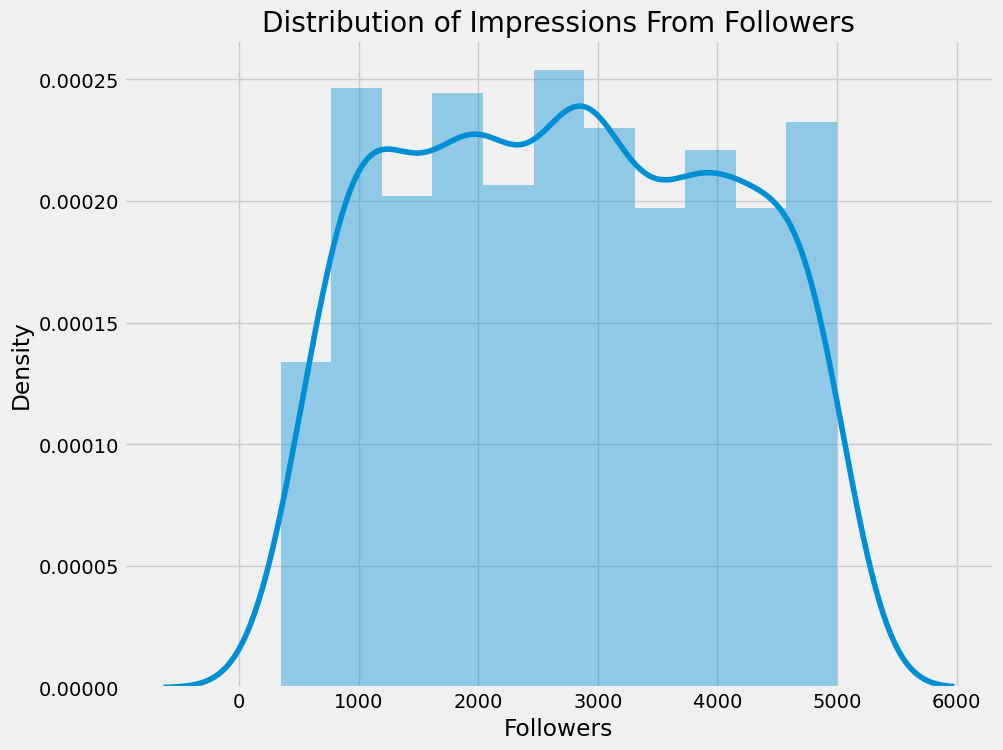

In [43]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

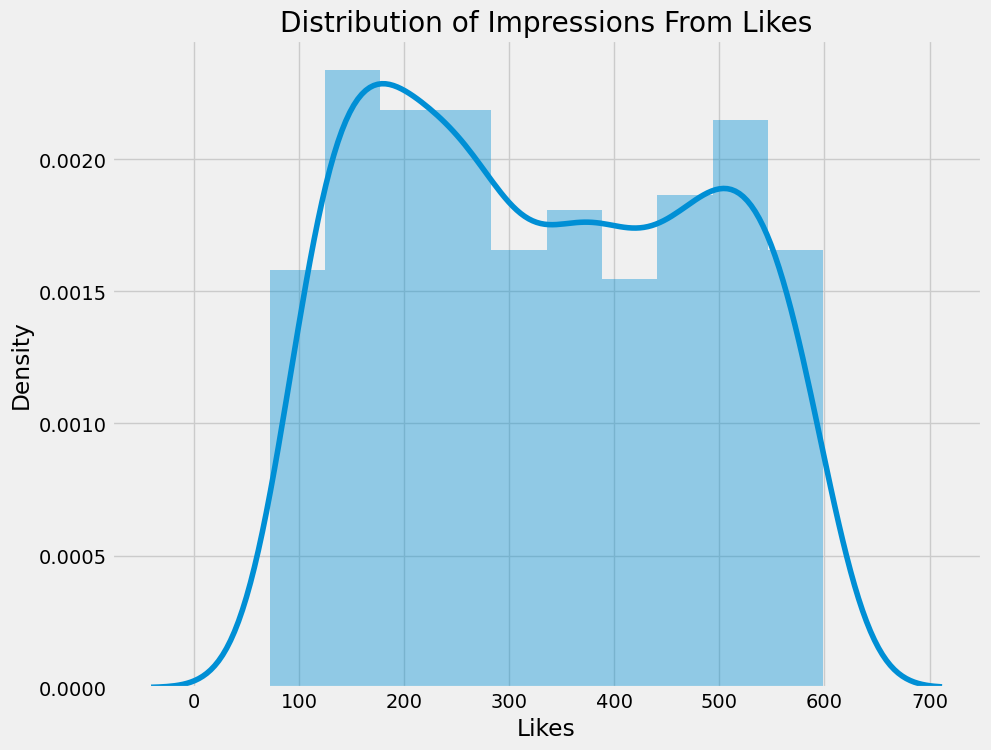

In [44]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

relationship between likes and followers

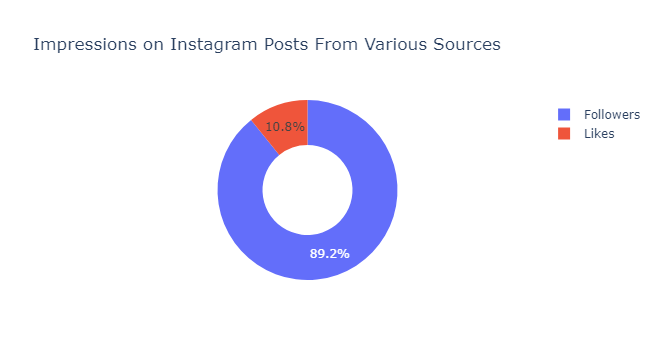

In [45]:
followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

Relationship betwenn followers and likes

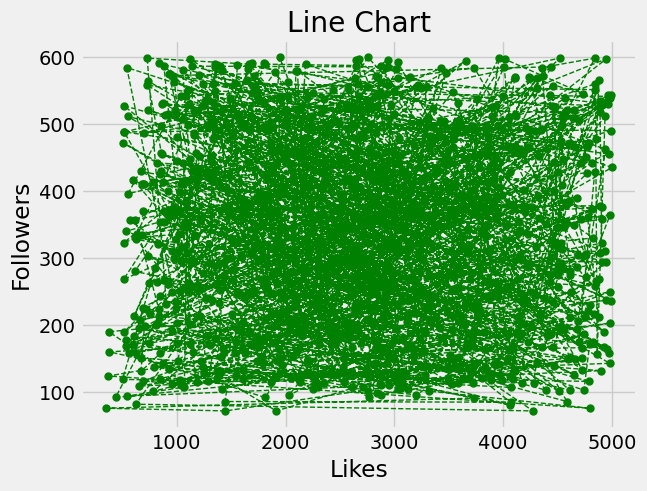

In [46]:
x = df["Followers"]
y = df["Likes"]
plt.plot(x, y, color='green', linewidth=1, marker='o',markersize=5, linestyle='--')
plt.title("Line Chart")
plt.ylabel('Followers')
plt.xlabel('Likes')
 
plt.show()

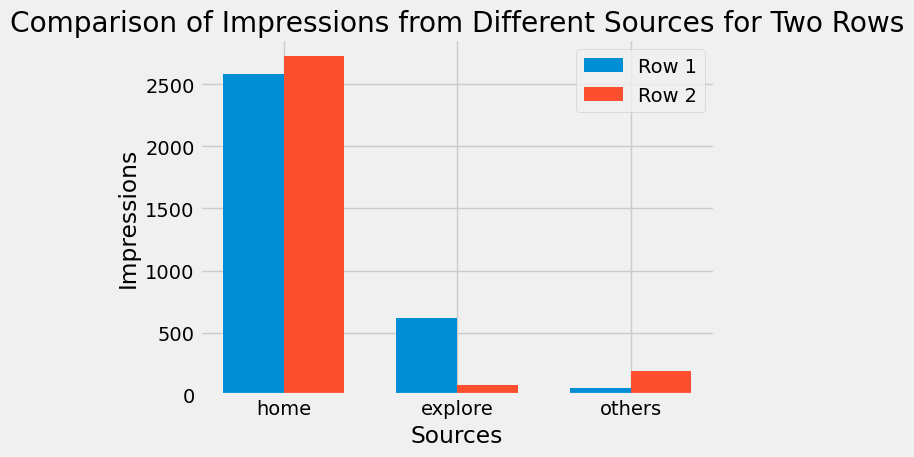

In [47]:

# Sample dataset (replace this with your actual dataset)
data = {
    'home': [2586, 2727],
    'explore': [619, 78],
    'others': [56, 194]
}

# Convert the dictionary to DataFrame
df = pd.DataFrame(data, index=['Row1', 'Row2'])

# Extracting sources and impressions for each row
sources = df.columns
impressions_row1 = df.loc['Row1']
impressions_row2 = df.loc['Row2']

# Set the width of the bars
bar_width = 0.35
index = range(len(sources))

# Plotting the bar graph
plt.bar(index, impressions_row1, bar_width, label='Row 1')
plt.bar([i + bar_width for i in index], impressions_row2, bar_width, label='Row 2')

# Adding labels, title, and legend
plt.xlabel('Sources')
plt.ylabel('Impressions')
plt.title('Comparison of Impressions from Different Sources for Two Rows')
plt.xticks([i + bar_width / 2 for i in index], sources)
plt.legend()

# Displaying the graph
plt.tight_layout()
plt.show()


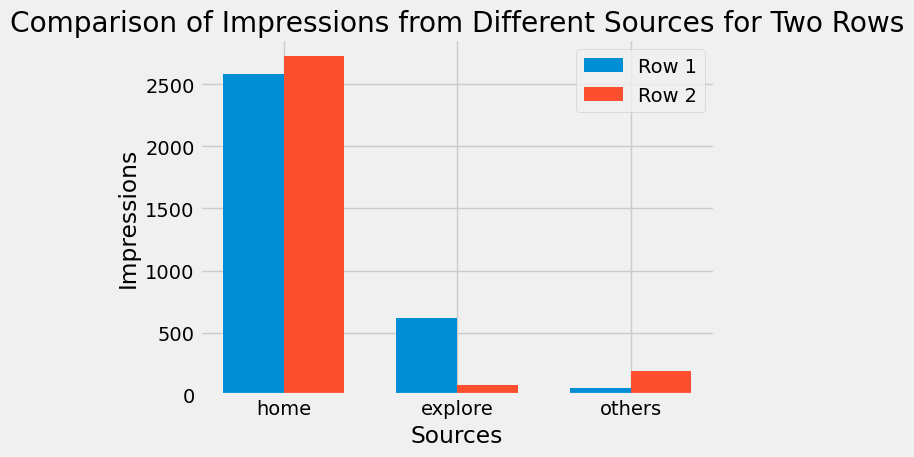

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample dataset (replace this with your actual dataset)
df = pd.DataFrame({
    'home': {'Row1': 2586, 'Row2': 2727},
    'explore': {'Row1': 619, 'Row2': 78},
    'others': {'Row1': 56, 'Row2': 194}
})

# Extracting sources and impressions for each row
sources = df.columns
impressions_row1 = df.loc['Row1']
impressions_row2 = df.loc['Row2']

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(sources))

# Plotting the bar graph
plt.bar(index, impressions_row1, bar_width, label='Row 1')
plt.bar(index + bar_width, impressions_row2, bar_width, label='Row 2')

# Adding labels, title, and legend
plt.xlabel('Sources')
plt.ylabel('Impressions')
plt.title('Comparison of Impressions from Different Sources for Two Rows')
plt.xticks(index + bar_width / 2, sources)
plt.legend()

# Displaying the graph
plt.tight_layout()
plt.show()


In [49]:
df = pd.read_csv('dataset.csv', encoding='latin1')
df

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0            3920       2586           1028           619          56     98   
1            5394       2727           1838          1174          78    194   
2            4021       2085           1188             0         533     41   
3            4528       2700            621           932          73    172   
4            2518       1704            255           279          37     96   
...           ...        ...            ...           ...         ...    ...   
1002        17907       3828           1024           613         503     71   
1003         9457       2568           1868           469         515    415   
1004         9625       2286            731           413         182    128   
1005        12776       2367            309           299          27    601   
1006         7306       2543            599           821         587    536   

      Comments  Shares  Followers  Likes  Profile Visits  Follows  \
0          9.0       5       3266    162              35        2   
1          7.0      14        715    224              48       10   
2         11.0       1        672    131              62       12   
3         10.0       7       1217    213              23        8   
4          5.0       4       2100    123               8        0   
...        ...     ...        ...    ...             ...      ...   
1002      21.0      15       1879    462              94       31   
1003      15.0       8       2946    558              99      137   
1004      39.0      15       1381    289              78       98   
1005      20.0       6       3317    209             100       87   
1006      32.0      15       3019    194              34       66   

      Time since posted                                            Caption  \
0                     3  Here are some of the most important data visua...   
1                     2  Here are some of the best data science project...   
2                    11  Learn how to train a machine learning model an...   
3                    16  Hereâs how you can write a Python program to...   
4                    17  Plotting annotations while visualizing your da...   
...                 ...                                                ...   
1002                 23  Time series analysis means analyzing and findi...   
1003                 21  Here are some of the best data sources that yo...   
1004                 19  One of the mistakes data science newbies make ...   
1005                 16  Here are some of the best data science project...   
1006                 19  178 Python Projects with Source Code solved an...   

                                               Hashtags  
0     #financeÂ #moneyÂ #businessÂ #investingÂ #inve...  
1     #healthcareÂ #healthÂ #covidÂ #dataÂ #datascie...  
2     #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
3     #pythonÂ #pythonprogrammingÂ #pythonprojectsÂ ...  
4     #datavisualizationÂ #datascienceÂ #dataÂ #data...  
...                                                 ...  
1002  #timeseriesÂ #timeÂ #statisticsÂ #datascienceÂ...  
1003  #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
1004  #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
1005  #dataÂ #datascienceÂ #dataanalysisÂ #dataanaly...  
1006  #pythonÂ #pythonprogrammingÂ #pythonprojectsÂ ...  

[1007 rows x 15 columns]

correlation

In [50]:
# Convert all values in "Time since posted" column to strings
df["Time since posted"] = df["Time since posted"].astype(str)

# Apply regular expression substitution only to string values
df["Time since posted"] = df["Time since posted"].map(lambda x: float(re.sub('[^\d.]', '', x)) if isinstance(x, str) else x)

In [51]:
df.head


<bound method NDFrame.head of       Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0            3920       2586           1028           619          56     98   
1            5394       2727           1838          1174          78    194   
2            4021       2085           1188             0         533     41   
3            4528       2700            621           932          73    172   
4            2518       1704            255           279          37     96   
...           ...        ...            ...           ...         ...    ...   
1002        17907       3828           1024           613         503     71   
1003         9457       2568           1868           469         515    415   
1004         9625       2286            731           413         182    128   
1005        12776       2367            309           299          27    601   
1006         7306       2543            599           821         587    536   

      Com

In [52]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
correlation = df_numeric.corr()
print(correlation["Followers"].sort_values(ascending=False))

Followers            1.000000
Saves                0.053645
From Explore         0.027525
From Hashtags        0.024162
Follows              0.021908
From Other           0.019371
Profile Visits       0.019102
Shares               0.018289
Impressions          0.008364
Likes                0.006204
Time since posted   -0.014246
From Home           -0.020870
Comments            -0.026300
Caption                   NaN
Hashtags                  NaN
Name: Followers, dtype: float64


In [53]:

x = np.array(df[["Followers"]])
y = np.array(df["Likes"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

-2.5628706658934646

In [55]:
features = np.array([[1500]])
model.predict(features)

array([49.67912095])

checking for the best model to work  with for the project

In [56]:
df['Caption']=le.fit_transform(df['Caption'])
df['Hashtags']=le.fit_transform(df['Hashtags'])

In [57]:
df['Time since posted'] = df['Time since posted'].astype(str).str.extract('(\d+)').astype(int)


In [58]:
df

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0            3920       2586           1028           619          56     98   
1            5394       2727           1838          1174          78    194   
2            4021       2085           1188             0         533     41   
3            4528       2700            621           932          73    172   
4            2518       1704            255           279          37     96   
...           ...        ...            ...           ...         ...    ...   
1002        17907       3828           1024           613         503     71   
1003         9457       2568           1868           469         515    415   
1004         9625       2286            731           413         182    128   
1005        12776       2367            309           299          27    601   
1006         7306       2543            599           821         587    536   

      Comments  Shares  Followers  Likes  Profile Visits  Follows  \
0          9.0       5       3266    162              35        2   
1          7.0      14        715    224              48       10   
2         11.0       1        672    131              62       12   
3         10.0       7       1217    213              23        8   
4          5.0       4       2100    123               8        0   
...        ...     ...        ...    ...             ...      ...   
1002      21.0      15       1879    462              94       31   
1003      15.0       8       2946    558              99      137   
1004      39.0      15       1381    289              78       98   
1005      20.0       6       3317    209             100       87   
1006      32.0      15       3019    194              34       66   

      Time since posted  Caption  Hashtags  
0                     3       55        32  
1                     2       45        33  
2                    11       89        19  
3                    16       76        45  
4                    17       96         8  
...                 ...      ...       ...  
1002                 23      102        53  
1003                 21       48        13  
1004                 19       94        13  
1005                 16       44        13  
1006                 19        8        45  

[1007 rows x 15 columns]

In [59]:
X=df.drop(labels=['Impressions','From Home','From Hashtags','From Explore','From Other','Saves','Comments','Shares','Profile Visits','Follows','Time since posted','Likes'],axis=1)

In [60]:
X

Followers  Caption  Hashtags
0          3266       55        32
1           715       45        33
2           672       89        19
3          1217       76        45
4          2100       96         8
...         ...      ...       ...
1002       1879      102        53
1003       2946       48        13
1004       1381       94        13
1005       3317       44        13
1006       3019        8        45

[1007 rows x 3 columns]

In [61]:
print(df.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Followers', 'Likes',
       'Profile Visits', 'Follows', 'Time since posted', 'Caption',
       'Hashtags'],
      dtype='object')


In [62]:
y = df[['Time since posted','Likes']]

In [63]:
y

Time since posted  Likes
0                     3    162
1                     2    224
2                    11    131
3                    16    213
4                    17    123
...                 ...    ...
1002                 23    462
1003                 21    558
1004                 19    289
1005                 16    209
1006                 19    194

[1007 rows x 2 columns]

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [65]:
X_train

Followers  Caption  Hashtags
839       3029       85        51
185       1148      103        41
358       3474       45        33
955       3286       76        45
135        684       53         0
..         ...      ...       ...
637       3489       70        18
361       1037       96         8
817       4646       65        42
310       2879       52         1
331       1641       28        31

[755 rows x 3 columns]

In [66]:
y_train

Time since posted  Likes
839                  9    231
185                  4    160
358                  7    473
955                  3    191
135                 20    411
..                 ...    ...
637                 20    121
361                  8    411
817                  7    349
310                 17    257
331                 22    372

[755 rows x 2 columns]

In [67]:
X_train_scaled=scaler.fit_transform(X_train)

In [68]:
X_test_scaled=scaler.transform(X_test)

In [69]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
   

    return r2, mae,mse,

In [70]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

In [71]:
for i in range(len(models)):
    model=list((models.values()))[i]
    print(model)
    
    
r2_list=[]

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()


In [72]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
   

    return r2, mae,mse,

In [73]:
for i in range(len(models)):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    R2,MAE,MSE=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    
    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 11279.090749656532
MAE: 68.14721988963014
R2 SCORE: -0.021187918341058487


model training performance Lasso()
MSE: 11277.591358209917
MAE: 68.14178010870388
R2 SCORE: -0.02049984871124544


model training performance Ridge()
MSE: 11279.089726532664
MAE: 68.14721820458028
R2 SCORE: -0.021187868184725955


model training performance ElasticNet()
MSE: 11277.95232441118
MAE: 68.14340790124906
R2 SCORE: -0.020717985132556627


model training performance RandomForestRegressor()
MSE: 13449.27144920635
MAE: 71.80749999999998
R2 SCORE: -0.21151277394540136




Instagram Reach Prediction Model

using passive agressive regressor

In [74]:
x = np.array(df[['Likes', 'Saves','Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
                                                
                                                

In [75]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

-0.1473351098270761

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [76]:
# Features = [['Likes','Saves','Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0,233.0,9.0, 165.0, 54.0]])
model.predict(features)

array([12208.04248814])

using RandomForestRegressor

In [77]:
x = np.array(df[['Likes', 'Saves','Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.02453312665604246

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [79]:
# Features = [['Likes','Saves','Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11297.94])

using Lasso

In [80]:
x = np.array(df[['Likes', 'Saves','Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
model = Lasso()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.03586833925465238

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [82]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0,9.0, 165.0, 54.0]])
model.predict(features)

array([11937.24400282])

sentiment analysis on comment

In [83]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Instantiate the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Example comment data
comments = df['Comments']

# Convert non-string values to empty strings
comments = comments.apply(lambda x: str(x) if type(x) != str else x)

# Perform sentiment analysis on each comment and extract compound score
sentiment_scores = comments.apply(lambda comment: sid.polarity_scores(comment)['compound'])

# Classify comments based on compound score
sentiment_labels = sentiment_scores.apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Print sentiment distribution
print("Number of Positive Comments:", (sentiment_labels == 'Positive').sum())
print("Number of Negative Comments:", (sentiment_labels == 'Negative').sum())
print("Number of Neutral Comments:", (sentiment_labels == 'Neutral').sum())


Number of Positive Comments: 0
Number of Negative Comments: 0
Number of Neutral Comments: 1007


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arjit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


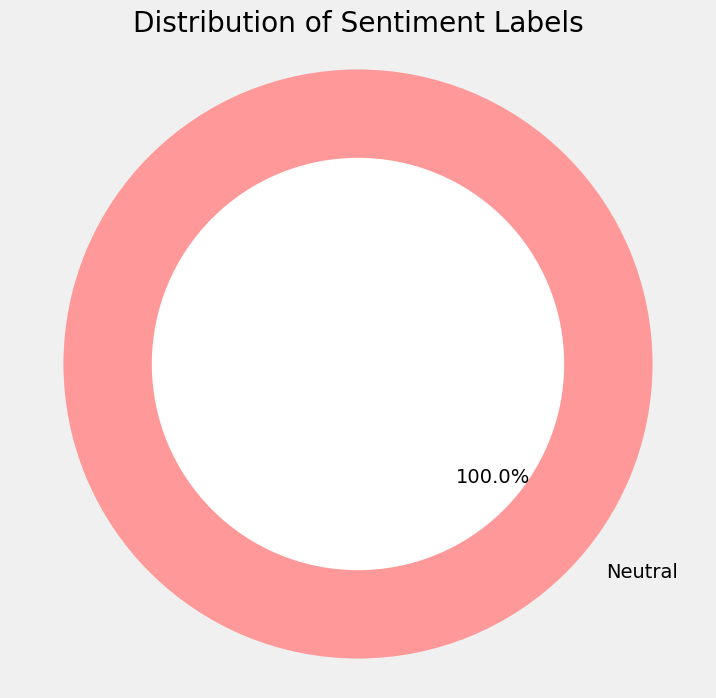

In [84]:
import matplotlib.pyplot as plt

# Count the number of comments for each sentiment label
sentiment_counts = sentiment_labels.value_counts()

# Define colors for each sentiment label
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Distribution of Sentiment Labels')

# Show plot
plt.show()


sentiment analysis on caption

In [85]:
sid = SentimentIntensityAnalyzer()

# Example caption data
captions = df['Caption']

# Convert captions to strings
captions = captions.astype(str)

# Perform sentiment analysis on each caption and extract compound score
sentiment_scores = captions.apply(lambda caption: sid.polarity_scores(caption)['compound'])

# Classify captions based on compound score
sentiment_labels = sentiment_scores.apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Combine sentiment scores and labels into a DataFrame
sentiment_df = pd.DataFrame({'Caption': df['Caption'], 'Sentiment Score': sentiment_scores, 'Sentiment Label': sentiment_labels})

# Display the sentiment analysis results
print(sentiment_df)

      Caption  Sentiment Score Sentiment Label
0          55              0.0         Neutral
1          45              0.0         Neutral
2          89              0.0         Neutral
3          76              0.0         Neutral
4          96              0.0         Neutral
...       ...              ...             ...
1002      102              0.0         Neutral
1003       48              0.0         Neutral
1004       94              0.0         Neutral
1005       44              0.0         Neutral
1006        8              0.0         Neutral

[1007 rows x 3 columns]


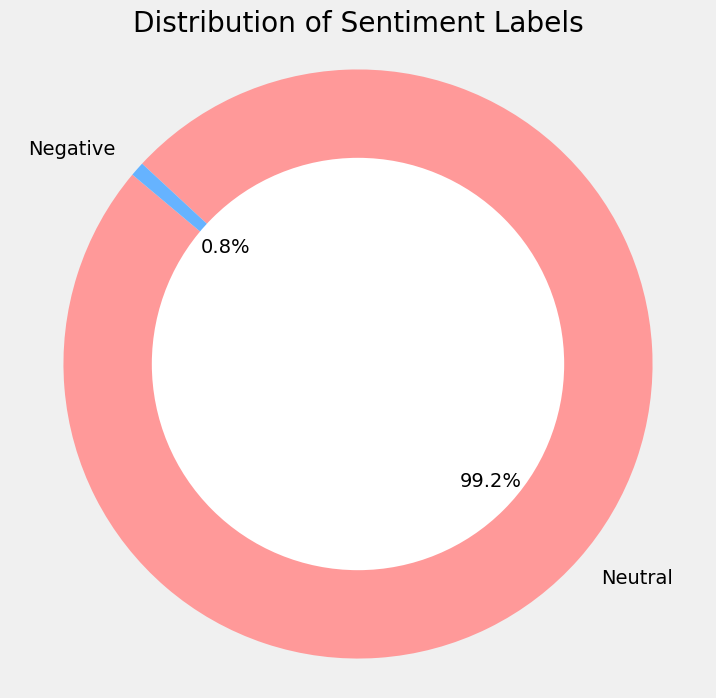

In [86]:
# Count the number of captions for each sentiment label
sentiment_counts = sentiment_df['Sentiment Label'].value_counts()

# Define colors for each sentiment label
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Distribution of Sentiment Labels')

# Show plot
plt.show()

In [89]:
df = pd.read_csv('dataset.csv', encoding='latin1')

In [90]:
df = df.drop(['Impressions','From Home','From Hashtags','From Explore','From Other','Saves','Comments','Shares','Profile Visits','Follows','Caption','Hashtags'
], axis=1)

In [92]:
df.head()

Followers  Likes  Time since posted
0       3266    162                  3
1        715    224                  2
2        672    131                 11
3       1217    213                 16
4       2100    123                 17

In [93]:
df.columns

Index(['Followers', 'Likes', 'Time since posted'], dtype='object')

In [95]:
# Splitting X and y for all Experiments
X = df.drop(['Likes', 'Time since posted'], axis=1)
y = df[['Likes', 'Time since posted']]

In [96]:
X.head()

Followers
0       3266
1        715
2        672
3       1217
4       2100

In [97]:
y.head()

Likes  Time since posted
0    162                  3
1    224                  2
2    131                 11
3    213                 16
4    123                 17

In [98]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: MAE, MSE, RMSE, r2score
    '''
    MAE = mean_absolute_error(true, predicted) # Calculate Mean Absolute Error
    MSE = mean_squared_error(true, predicted) # Calculate Mean Squared Error
    RMSE =np.sqrt(MSE) # Calculate Root Mean Squared Error
    r2score = r2_score(true, predicted)  # Calculate R_squaredScore/R2score
    return MAE, MSE, RMSE, r2score

In [99]:
# Dictionary which contains models for experiment
models = {
    "Linear Regresson": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor ": Lasso(),
    "Elastic Net Regressor": ElasticNet(),
    "SVR": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
    }

In [100]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics.
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    # Applying Satndard Normalization method (Z-Score Equation):
    scalar = StandardScaler()
    X_train = scalar.fit_transform(X_train)
    X_test = scalar.transform(X_test)
    
    models_list = []
    MAE_train_list = []
    MAE_test_list = []
    MSE_train_list = []
    MSE_test_list = []
    RMSE_train_list = []
    RMSE_test_list = []
    r2score_train_list = []
    r2score_test_list = []
    r2score_diff = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        wrapper = MultiOutputRegressor(model)
        wrapper.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = wrapper.predict(X_train)
        y_test_pred = wrapper.predict(X_test)

        # Training set performance
        model_train_MAE, model_train_MSE, model_train_RMSE,\
        model_train_r2score = evaluate_clf(y_train ,y_train_pred)
        
        MAE_train_list.append(model_train_MAE)
        MSE_train_list.append(model_train_MSE)
        RMSE_train_list.append(model_train_RMSE)
        r2score_train_list.append(model_train_r2score*100)
    
        # Test set performance
        model_test_MAE,model_test_MSE,model_test_RMSE,\
        model_test_r2score = evaluate_clf(y_test, y_test_pred)
        
        MAE_test_list.append(model_test_MAE)
        MSE_test_list.append(model_test_MSE)
        RMSE_test_list.append(model_test_RMSE)
        r2score_test_list.append(model_test_r2score*100)
        
        # r2score_train_test_difference
        r2score_diff.append(max(model_train_r2score, model_test_r2score) - 
                            min(model_train_r2score, model_test_r2score))  
    
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- MAE: {:.4f}".format(model_train_MAE))
        print('- MSE: {:.4f}'.format(model_train_MSE)) 
        print('- RMSE: {:.4f}'.format(model_train_RMSE))
        print('- r2score: {:.4f}'.format(model_train_r2score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- MAE: {:.4f}'.format(model_test_MAE))
        print('- MSE: {:.4f}'.format(model_test_MSE))
        print('- RMSE: {:.4f}'.format(model_test_RMSE))
        print('- r2score: {:.4f}'.format(model_test_r2score))
        
        print('='*35)
        print('\n')    
        
    report = pd.DataFrame(list(zip(models_list, MAE_train_list, MAE_test_list, MSE_train_list, MSE_test_list, RMSE_train_list, RMSE_test_list, r2score_train_list,  r2score_test_list, r2score_diff)), columns=['Model Name', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test', 'RMSE_train', 'RMSE_test', 'r2score_train', 'r2score_test','r2score_diff']).sort_values(by='r2score_test',ascending=False)
        
    return report

In [101]:
report = evaluate_models(X, y, models)

Linear Regresson
Model performance for Training set
- MAE: 68.9909
- MSE: 11315.5958
- RMSE: 106.3748
- r2score: 0.0005
----------------------------------
Model performance for Test set
- MAE: 66.9409
- MSE: 11049.9367
- RMSE: 105.1187
- r2score: -0.0049


Ridge Regressor
Model performance for Training set
- MAE: 68.9909
- MSE: 11315.5958
- RMSE: 106.3748
- r2score: 0.0005
----------------------------------
Model performance for Test set
- MAE: 66.9409
- MSE: 11049.9162
- RMSE: 105.1186
- r2score: -0.0049


Lasso Regressor 
Model performance for Training set
- MAE: 68.9971
- MSE: 11316.1120
- RMSE: 106.3772
- r2score: 0.0001
----------------------------------
Model performance for Test set
- MAE: 66.9185
- MSE: 11043.3503
- RMSE: 105.0873
- r2score: -0.0033


Elastic Net Regressor
Model performance for Training set
- MAE: 68.9980
- MSE: 11316.2379
- RMSE: 106.3778
- r2score: 0.0001
----------------------------------
Model performance for Test set
- MAE: 66.9164
- MSE: 11042.6342
- RMSE

In [102]:
report

Model Name  MAE_train   MAE_test     MSE_train      MSE_test  \
3     Elastic Net Regressor  68.998023  66.916352  11316.237908  11042.634199   
2          Lasso Regressor   68.997129  66.918499  11316.112042  11043.350282   
6        AdaBoost Regressor  68.265556  66.487018  11096.271902  10946.180562   
1           Ridge Regressor  68.990898  66.940876  11315.595827  11049.916209   
0          Linear Regresson  68.990886  66.940936  11315.595823  11049.936674   
4                       SVR  68.807738  66.912987  11347.317268  11148.262308   
7         Gradient Boosting  58.881079  66.584553   8579.780441  11074.695775   
5     K-Neighbors Regressor  57.429193  67.894554   8780.699652  12153.158515   
8              XGBRegressor  53.727706  66.871158   7764.018675  12061.023671   
10  Random Forest Regressor  31.478458  76.209278   2914.783211  15448.274671   
9   Decision Tree Regressor   7.794410  87.522277   1059.496170  20886.396040   

    RMSE_train   RMSE_test  r2score_train  r2score_test  r2score_diff  
3   106.377807  105.083939       0.009519     -0.326229      0.003357  
2   106.377216  105.087346       0.010076     -0.329480      0.003396  
6   105.338843  104.623996       2.051439     -0.398293      0.024497  
1   106.374789  105.118582       0.048579     -0.491653      0.005402  
0   106.374789  105.118679       0.048579     -0.491948      0.005405  
4   106.523787  105.585332       0.140064     -2.038073      0.021781  
7    92.627104  105.236380      23.793996     -3.759388      0.275534  
5    93.705388  110.241365      21.605573    -16.450625      0.380562  
8    88.113669  109.822692      31.203250    -20.300383      0.515036  
10   53.988732  124.291088      74.915348    -42.551905      1.174673  
9    32.549903  144.521265      91.366861    -87.741797      1.791087

In [103]:
final_model = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state=42, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
wrapper = MultiOutputRegressor(final_model)

final_model = wrapper.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final RandomForest Regressor Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final RandomForest Regressor Accuracy Score (Test) :", r2_score(y_pred,y_test))

Final RandomForest Regressor Accuracy Score (Train) : 0.1131528861156918
Final RandomForest Regressor Accuracy Score (Test) : -46.92357913463991


In [104]:
# Let's predict:
print(X_test[2])
y_pred = final_model.predict([X_test[0]])
y_pred
print("Nnumber of Likes: ", y_pred[0][0])
print("Time since posted: ", y_pred[0][1], 'hours')

[-0.74614677]
Nnumber of Likes:  365.83964174931936
Time since posted:  10.733233600323942 hours
